In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


0      0
1      1
2      1
3      1
4      0
      ..
627    0
628    0
629    1
630    1
631    0
Name: Survived, Length: 632, dtype: int64


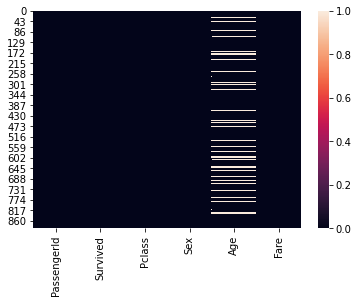

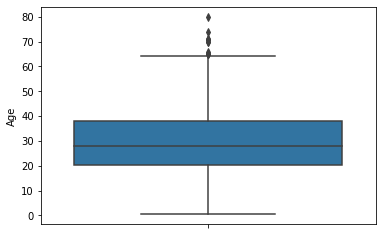

In [2]:
df=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')

plt.figure(5)
df=df.drop(columns=['Name','SibSp','Ticket','Cabin','Parch','Embarked'])
sns.heatmap(df.isnull(),),
plt.figure(2)
sns.boxplot(data=df,y='Age')
# from boxplot 75th%ile seems to b 38 n 25th percentile seems to be 20.....
#so multiplying by 1.5  at both ends so Age(10,57) seems good and any value outside this ...lets consider as outliers..
#also using this age for calaculating mean for replacing na values of age.
df=df.loc[df['Age'].between(9,58),]
df=df.reset_index(drop=True,)
class_3_age=df.loc[df['Pclass']==3].Age.mean()
class_2_age=df.loc[df['Pclass']==2].Age.mean()
class_1_age=df.loc[df['Pclass']==1].Age.mean()
def remove_null_age(data):
    agee=data[0]
    pclasss=data[1]
    if pd.isnull(agee):
        if pclasss==1:
            return class_1_age
        elif pclasss==2:
            return class_2_age
        else:
            return  class_3_age

    return agee
df['Age']=df[["Age","Pclass"]].apply(remove_null_age,axis=1)

sex=pd.get_dummies(df['Sex'],drop_first=True)
sex=sex.reset_index(drop=True)
df=df.drop(columns=['Sex'])
df=pd.concat([df,sex],axis=1)
survived=df["Survived"]
print(survived)


In [3]:
from  sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df.drop("Survived",axis=1),survived,test_size=.27,random_state=101)

from sklearn.linear_model import LogisticRegression
logisticreg=LogisticRegression()
logisticreg.fit(x_train,y_train)
predictions=logisticreg.predict(x_test)

from sklearn.metrics import  accuracy_score
print(logisticreg.score(x_train, y_train))

0.8004338394793926
